<a href="https://colab.research.google.com/github/wsaleschaves/MVP_ML_-_Analytics/blob/main/Wellington_Sales_MVP_ML_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Template — MVP: *Machine Learning & Analytics*
**Autor:** _Wellington Sales Chaves_  

**Data:** 27/08/2025

**Matrícula:** 2025000

**Dataset:** [game_sales](https://www.kaggle.com/datasets/gregorut/videogamesales)



## ✅ Checklist do MVP (o que precisa conter)
- [ ] **Problema definido** e contexto de negócio
- [ ] **Carga e preparação** dos dados (sem vazamento de dados)
- [ ] **Divisão** em treino/validação/teste (ou validação cruzada apropriada)
- [ ] **Tratamento**: limpeza, transformação e **engenharia de atributos**
- [ ] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- [ ] **Otimização de hiperparâmetros**
- [ ] **Avaliação** com **métricas adequadas** e discussão de limitações
- [ ] **Boas práticas**: seeds fixas, tempo de treino, recursos computacionais, documentação
- [ ] **Pipelines reprodutíveis** (sempre que possível)



## 1. Escopo, objetivo e definição do problema

**Escopo:**  O conjunto de dados disponibilizado contém informações históricas sobre jogos eletrônicos, incluindo título, plataforma, ano de lançamento, gênero, editora e volume de vendas em diferentes regiões do mundo.

**Objetivo:** O objetivo do estudo é desenvolver um modelo preditivo para estimar as vendas globais de jogos com base em suas características (gênero, plataforma, ano de lançamento e editora).

**Tipo de tarefa:** Regressão (previsão de uma variável contínua: Global_Sales).

**Área de aplicação:** Dados tabulares no setor de entretenimento/games.

**Valor para o negócio/usuário:** Apoiar editoras e desenvolvedores na previsão do potencial de vendas de novos jogos.

Permitir planejamento de marketing e alocação de recursos de forma mais eficiente.

Identificar quais características (gênero, plataforma, região) estão mais associadas ao sucesso comercial.


## 2. Reprodutibilidade e ambiente
Especifique o ambiente. Por exemplo:
- Bibliotecas usadas.
- Seeds fixas para reprodutibilidade.

In [ ]:
# === Setup básico ===
import os
import sys
import random
import time

# Manipulação de dados
import pandas as pd
import numpy as np

# Modelagem / validação
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    GridSearchCV,
    KFold,
    StratifiedKFold,
    TimeSeriesSplit
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Pré-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Modelos básicos
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import Ridge, LogisticRegression

# Modelos de ensemble
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    HistGradientBoostingClassifier,
    HistGradientBoostingRegressor
)

# Clusterização
from sklearn.cluster import KMeans

# Métricas
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    f1_score,
    silhouette_score
)

# Distribuições para busca de hiperparâmetros
from scipy.stats import randint, uniform

# Reprodutibilidade
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)


Python: 3.12.11
Seed global: 42



### 2.1 Dependências (opcional)
Instale pacotes extras se necessário. **Mantenha o projeto enxuto** para facilitar a correção.

Visualização → matplotlib, seaborn, plotly.

EDA → ydata_profiling.ProfileReport.

Modelos avançados → XGBoost, LightGBM, CatBoost.

Otimização → Optuna (ótimo para busca de hiperparâmetros).

Séries temporais → Statsmodels, pmdarima.

In [ ]:
# Bibliotecas de ML avançado (modelos adicionais):
!pip install -q xgboost lightgbm catboost

# Otimização de hiperparâmetros:
!pip install -q optuna

# Exploração e análise de dados:
!pip install -q ydata-profiling

# Visualizações:
!pip install -q seaborn plotly

# Séries temporais e estatística:
!pip install -q statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.3 MB/s eta 0:00:00


### 2.2 Funções python (opcional)
Defina, se necessário, funções em Python para reutilizar seu código e torná-lo mais organizado. Essa é uma boa prática de programação que facilita a leitura, manutenção e evolução do seu projeto.

In [ ]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score,
    silhouette_score
)

# --- Avaliação de classificação ---
def evaluate_classification(y_true, y_pred, proba=None):
    """
    Avalia modelos de classificação.
    Retorna acurácia, F1 ponderado e ROC AUC (binário ou multiclasse).
    """
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)

    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average="weighted")

    auc = np.nan
    if proba is not None:
        try:
            auc = roc_auc_score(y_true, proba, multi_class="ovr", average="weighted")
        except Exception:
            auc = np.nan

    return {
        "accuracy": round(acc, 3),
        "f1_weighted": round(f1w, 3),
        "roc_auc": round(auc, 3) if not np.isnan(auc) else np.nan
    }


# --- Avaliação de regressão ---
def evaluate_regression(y_true, y_pred):
    """
    Avalia modelos de regressão.
    Retorna MAE, RMSE e R².
    """
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {
        "mae": round(mae, 3),
        "rmse": round(rmse, 3),
        "r2": round(r2, 3)
    }


# --- Avaliação de clusterização ---
def evaluate_clustering(X_original, model):
    """
    Avalia modelos de clusterização com base no coeficiente de Silhouette.
    Funciona com pipelines que tenham pré-processamento.
    """
    try:
        if hasattr(model, "named_steps") and "pre" in model.named_steps:
            X_emb = model.named_steps["pre"].transform(X_original)
        else:
            X_emb = X_original.values if hasattr(X_original, "values") else X_original

        # Usa predict se já treinado, senão fit_predict
        if hasattr(model.named_steps["model"], "predict"):
            labels = model.named_steps["model"].predict(X_emb)
        else:
            labels = model.named_steps["model"].fit_predict(X_emb)

        if len(np.unique(labels)) < 2:
            return {"silhouette": np.nan, "erro": "Apenas 1 cluster encontrado."}

        sil = silhouette_score(X_emb, labels)
        return {"silhouette": round(sil, 3)}

    except Exception as e:
        return {"silhouette": np.nan, "erro": str(e)}



## 3. Dados: carga, entendimento e qualidade

**Origem dos dados**

O conjunto de dados utilizado neste projeto corresponde ao famoso “Video Game Sales Dataset”, disponível em repositórios públicos como Kaggle.
Ele reúne informações históricas de vendas de jogos de diversas plataformas, cobrindo o período de 1980 até 2016.

*Observação*: trata-se de um dataset público utilizado amplamente para fins acadêmicos e de pesquisa. Não contém dados pessoais sensíveis de usuários, apenas informações agregadas de mercado.

**Dicionário de variáveis**
- Colunas e suas	descrições
- Rank:	Posição no ranking global de vendas (1 = jogo mais vendido).
- Name:	Nome do jogo.
- Platform:	Plataforma de lançamento (ex.: Wii, PS4, NES).
- Year:	Ano de lançamento.
- Genre:	Gênero do jogo (ex.: Sports, Action, RPG, Racing).
- Publisher:	Empresa publicadora do jogo.
- NA_Sales:	Vendas na América do Norte (em milhões de cópias).
- EU_Sales:	Vendas na Europa (em milhões de cópias).
- JP_Sales:	Vendas no Japão (em milhões de cópias).
- Other_Sales:	Vendas em outras regiões (em milhões de cópias).
- Global_Sales:	Vendas globais (em milhões de cópias).

**Licença e ética**

- O dataset é de domínio público e voltado para uso em fins educacionais e exploratórios.
- Não há informações pessoais identificáveis (PII), portanto, não há risco de privacidade.
- O uso deste dataset não requer consentimento individual nem envolve dados sensíveis.
- O modelo desenvolvido não deve ser interpretado como previsão oficial de mercado, mas sim como exercício acadêmico.

**Cuidados metodológicos**
- Evitar vazamento de dados: o alvo (Global_Sales) não deve ser incluído como variável preditora, e variáveis altamente correlacionadas (como a soma das vendas regionais) devem ser avaliadas com cautela.
- O campo Rank também não deve ser usado como feature, pois é derivado do próprio alvo (Global_Sales).
- Name é um identificador textual e não deve ser usado diretamente no modelo.


In [1]:
# === Carga dos dados ===

import pandas as pd

url = "http://raw.githubusercontent.com/wsaleschaves/MVP_ML_-_Analytics/refs/heads/main/games_sales.csv"
df = pd.read_csv(url, sep=",", on_bad_lines="skip")

print("Dimensões:", df.shape)
print("Colunas:", df.columns.tolist())

# Pré-visualização
df.head()



Dimensões: (16572, 11)
Colunas: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Resumo das verificações iniciais

**Formato:** O dataset possui 16.572 linhas e 11 colunas, abrangendo dados de vendas, atributos de jogos e metadados.

**Tipos de dados:**

Variáveis categóricas: Rank, Name, Platform, Genre, Publisher.

Variáveis numéricas contínuas: Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales.

Observação: a coluna Rank foi carregada como object (texto), embora represente posição no ranking → pode precisar de conversão para numérico se usada em análises descritivas (não como feature do modelo).

**Valores ausentes:**

Pequena quantidade em variáveis descritivas (Name, Platform, Genre, Publisher).

Year tem 392 valores nulos, o que pode exigir tratamento (imputação ou exclusão dependendo da análise).

Variáveis de vendas (*_Sales e Global_Sales) têm 123 valores ausentes — importante para modelos de regressão, pois afeta diretamente o alvo (Global_Sales).

In [ ]:

# === Verificações iniciais ===
display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,target_reg
12569,12580,Melty Blood: Actress Again,PS2,2009.0,Fighting,Ecole,0.00,0.00,0.06,0.00,0.06,0.06
9463,9467,Disney Princess: Enchanting Storybooks,DS,2011.0,Misc,THQ,0.08,0.04,0.00,0.01,0.13,0.13
6433,6435,Don King Boxing,Wii,2009.0,Sports,Take-Two Interactive,0.14,0.10,0.00,0.03,0.27,0.27
8046,8050,Remember Me,X360,2013.0,Action,Capcom,0.10,0.07,0.00,0.02,0.18,0.18
7159,7161,Time Crisis: Crisis Zone,PS2,2004.0,Shooter,Namco Bandai Games,0.11,0.09,0.00,0.03,0.22,0.22



Formato: (16449, 12)

Tipos:
Rank             object
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
target_reg      float64
dtype: object

Valores ausentes por coluna:
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
target_reg      0
dtype: int64


In [ ]:
# 1. Remover linhas com Name ausente
before = df.shape[0]
df = df.dropna(subset=['Name'])
after = df.shape[0]
print(f"Removidas {before - after} linhas sem Name")

# 2. Preencher Year ausente com a mediana e converter para inteiro
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)

# 3. Preencher colunas de vendas ausentes com 0
vendas_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[vendas_cols] = df[vendas_cols].fillna(0)

# (opcional) checar consistência do Global_Sales
df["Global_Sales_check"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]
diff = (df["Global_Sales"] - df["Global_Sales_check"]).abs().sum()
print("Diferença total Global_Sales vs soma regiões:", diff)

# 4. Preencher colunas categóricas ausentes com "Unknown"
categ_cols = ['Platform', 'Genre', 'Publisher']
df[categ_cols] = df[categ_cols].fillna('Unknown')

# 5. Salvar a base limpa
df.to_csv("base_tratada.csv", index=False, encoding="utf-8")
print("Base tratada salva como 'base_tratada.csv'")


Removidas 0 linhas sem Name
Diferença total Global_Sales vs soma regiões: 45.00000000000028
Base tratada salva como 'base_tratada.csv'



### 3.1 Análise exploratória resumida (EDA)

Foi criada uma função que plota gráficos separados para todas as colunas da base.

- Numéricas: histogramas para analisar a distribuição dos valores, com cores skyblue e bordas brancas.

- Categóricas: gráficos de barras mostrando Top 10 categorias, com cores salmon e bordas brancas.

- Fundo do gráfico e da figura configurado para #3B3B3B, com títulos, eixos e ticks em branco para contraste.

- Inclui ajustes de layout (tight_layout) para melhor visualização e legibilidade.

- Objetivo: fornecer uma visão rápida e clara da distribuição de todas as colunas, ajudando na identificação de padrões e hipóteses sem sobrecarregar a visualização.


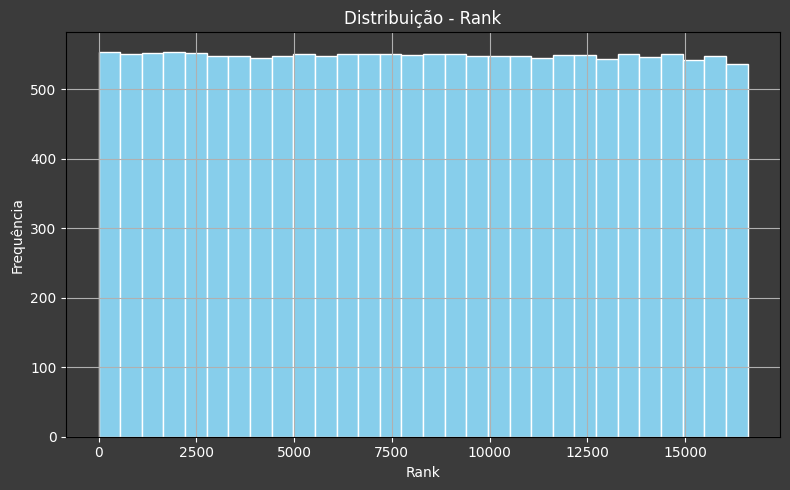

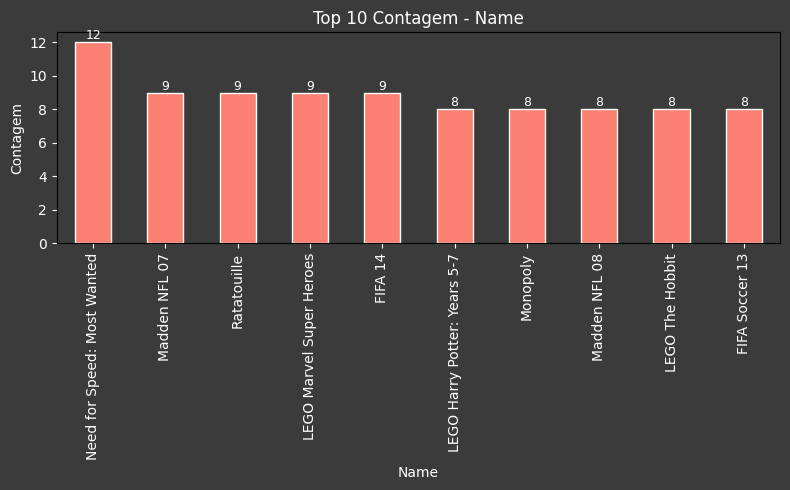

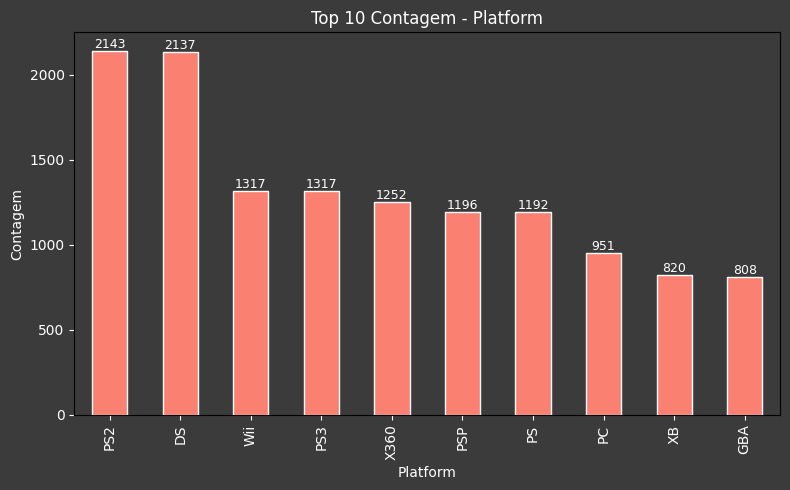

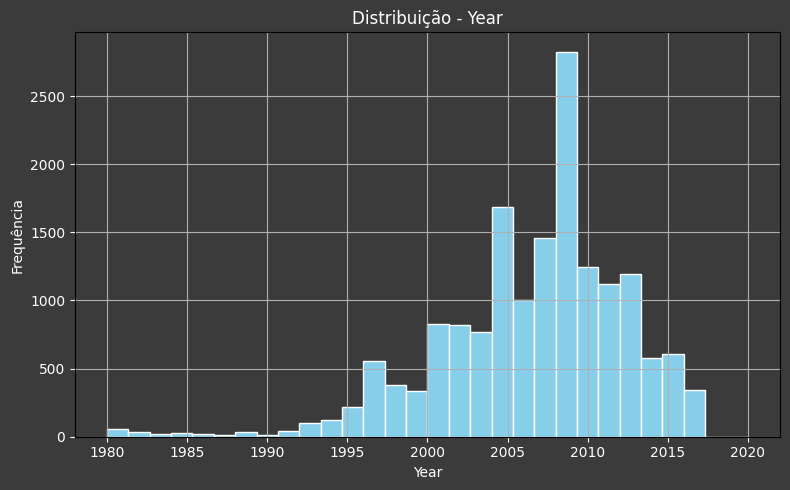

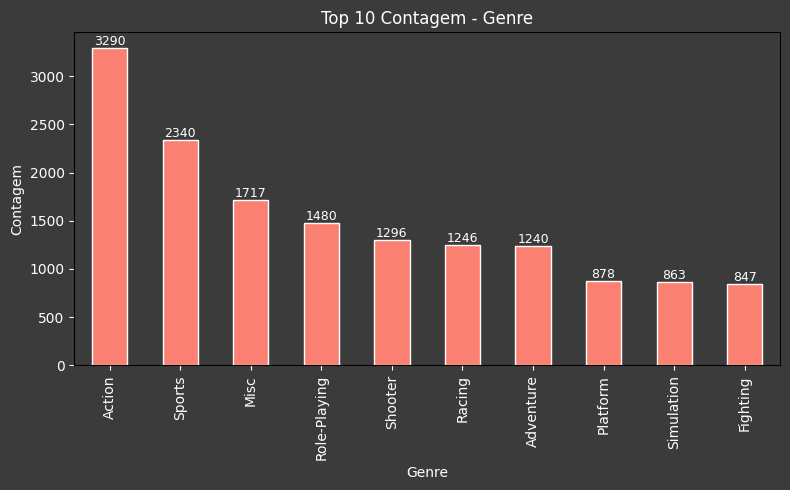

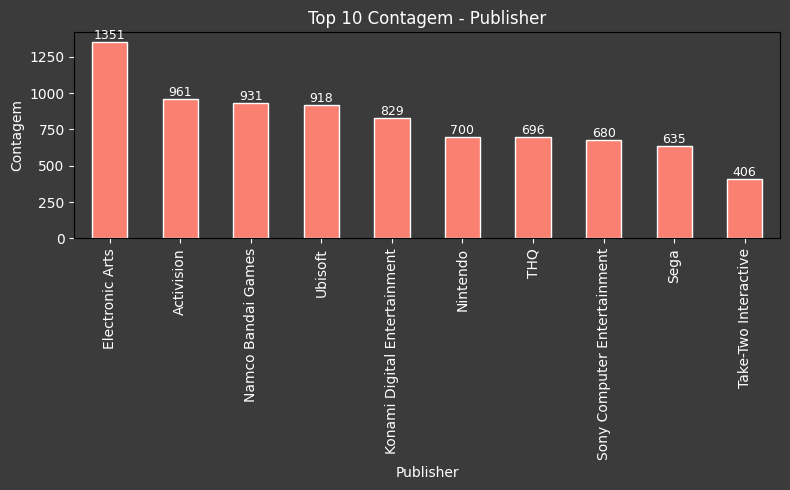

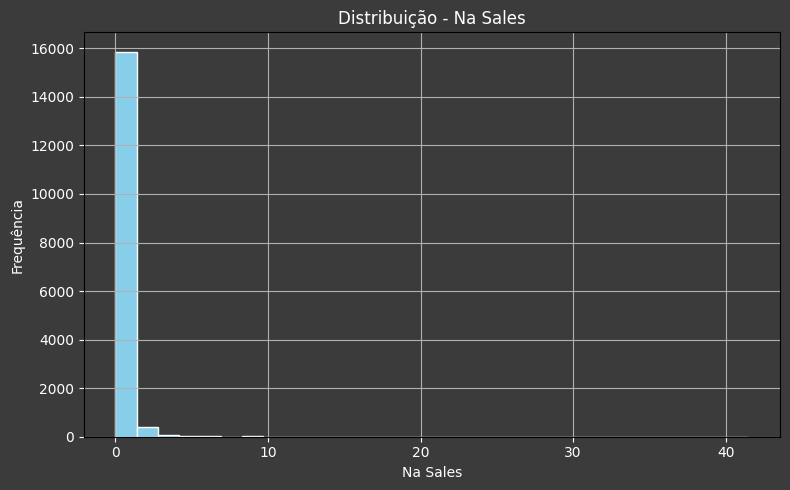

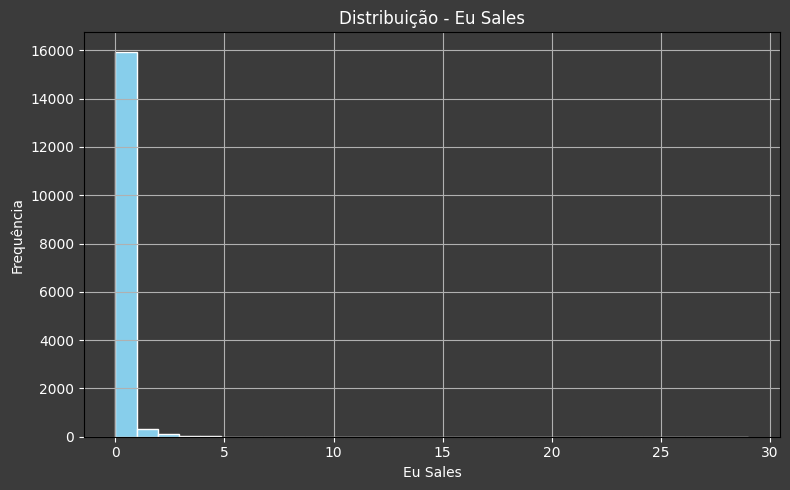

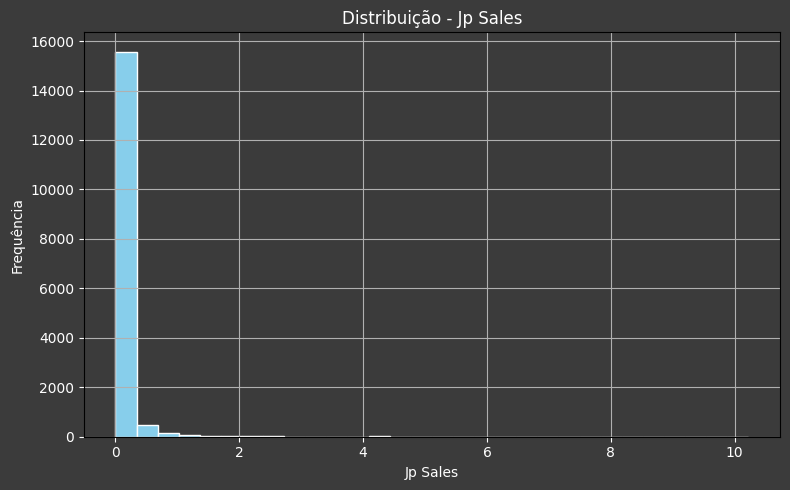

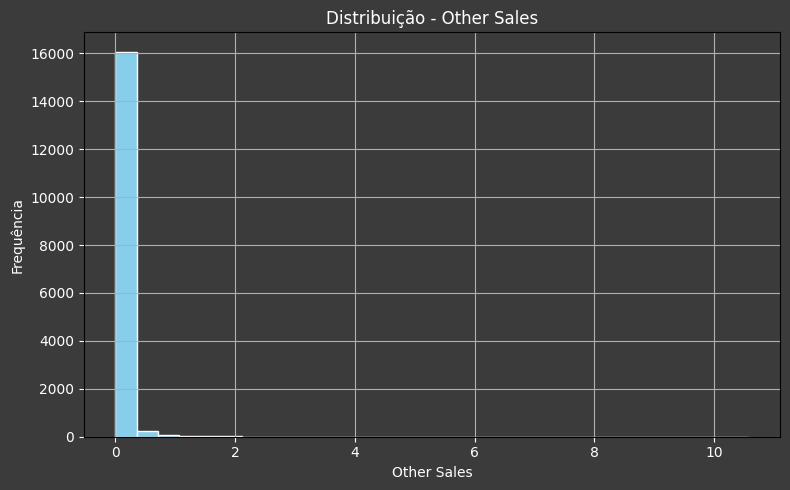

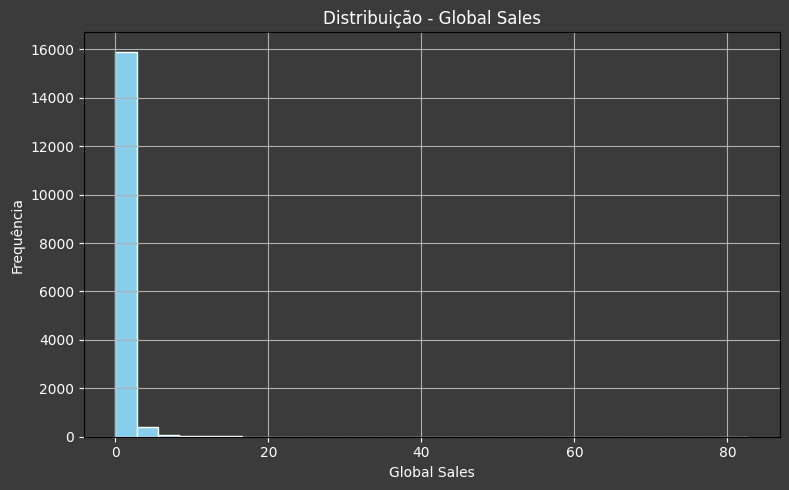

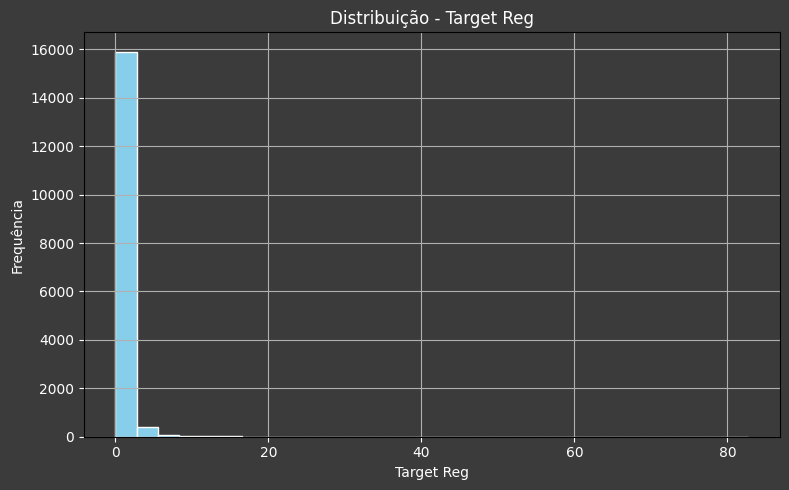

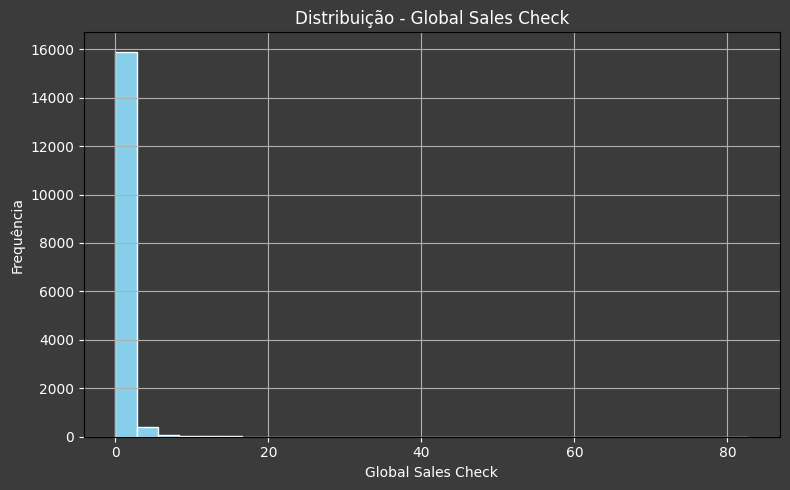

In [ ]:
# === 3.1 Análise exploratória resumida (EDA) ===

import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base tratada
df = pd.read_csv("base_tratada.csv", encoding="utf-8")

def plot_distributions_separados_dark(df, save=False, log_scale=False):
    """
    Plota gráficos separados para todas as colunas:
    - Histogramas (numéricas)
    - Barras Top 10 (categóricas)
    Fundo escuro e cores ajustadas.

    Args:
        df: DataFrame
        save: se True, salva gráficos como PNG em vez de exibir
        log_scale: se True, usa escala log nos histogramas
    """
    for col in df.columns:
        plt.figure(figsize=(8,5), facecolor='#3B3B3B')
        ax = plt.gca()
        ax.set_facecolor('#3B3B3B')

        # Nome mais legível para os eixos
        col_name = col.replace("_", " ").title()
        series = df[col].dropna()

        # Numéricas
        if pd.api.types.is_numeric_dtype(series):
            series.hist(bins=30, color='skyblue', edgecolor='white', log=log_scale)
            plt.title(f"Distribuição - {col_name}", color='white')
            plt.xlabel(col_name, color='white')
            plt.ylabel("Frequência", color='white')

        # Categóricas
        else:
            vc = series.value_counts().nlargest(10)
            ax = vc.plot(kind='bar', color='salmon', edgecolor='white')
            plt.title(f"Top 10 Contagem - {col_name}", color='white')
            plt.xlabel(col_name, color='white')
            plt.ylabel("Contagem", color='white')

            # Labels nas barras
            for p in ax.patches:
                ax.annotate(f"{int(p.get_height())}",
                            (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom', color='white', fontsize=9)

        ax.tick_params(colors='white')
        plt.tight_layout()

        if save:
            plt.savefig(f"eda_{col}.png", facecolor='#3B3B3B')
            plt.close()
        else:
            plt.show()

# Executar a função
plot_distributions_separados_dark(df)



## 4. Definição do target, variáveis e divisão dos dados

**Ajustes realizados**
- Criado target para regressão (Global_Sales) e classificação (binário baseado em sucesso).
- Excluídas colunas irrelevantes para modelagem (Name, Rank, Global_Sales quando não é target).
- Para série temporal, usei Year como proxy de timestamp.
- Mantida divisão treino/teste adequada para cada tipo de problema.

In [ ]:
# --- Função para criar pipeline e espaço de busca ---
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, KFold
from scipy.stats import randint
import numpy as np

def make_preprocess():
    """
    Cria pré-processamento padrão:
    - Numéricas: imputação por mediana
    - Categóricas: imputação por moda + OneHotEncoder
    """
    num_pre = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ])
    cat_pre = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])
    preprocess = ColumnTransformer(
        transformers=[
            ("num", num_pre, selector(dtype_include=np.number)),
            ("cat", cat_pre, selector(dtype_include=object)),
        ],
        remainder="drop",
        n_jobs=-1
    )
    return preprocess


def make_pipeline_and_space(problem_type: str, SEED=42):
    """
    Retorna pipeline, espaço de hiperparâmetros, scorer e CV
    de acordo com o tipo de problema.
    """
    preprocess = make_preprocess()

    if problem_type == "classificacao":
        model = RandomForestClassifier(random_state=SEED, n_jobs=-1)
        param_dist = {
            "model__n_estimators": randint(200, 600),
            "model__max_depth": randint(3, 30),
            "model__min_samples_split": randint(2, 20)
        }
        scorer = "f1_weighted"
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

    elif problem_type == "regressao":
        model = RandomForestRegressor(random_state=SEED, n_jobs=-1)
        param_dist = {
            "model__n_estimators": randint(200, 600),
            "model__max_depth": randint(3, 30),
            "model__min_samples_split": randint(2, 20)
        }
        scorer = "neg_root_mean_squared_error"
        cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

    elif problem_type == "clusterizacao":
        model = KMeans(n_init="auto", random_state=SEED)
        param_dist = {"model__n_clusters": randint(2, 12)}
        scorer = None
        cv = None

    else:
        raise ValueError("PROBLEM_TYPE deve ser 'classificacao', 'regressao' ou 'clusterizacao'.")

    pipe = Pipeline([("pre", preprocess), ("model", model)])
    return pipe, param_dist, scorer, cv

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

SEED = 42
PROBLEM_TYPE = "regressao"  # ou "classificacao", "clusterizacao"

# --- Target e features ---
SUCCESS_THRESHOLD = 1.0
if PROBLEM_TYPE == "classificacao":
    df['target_clf'] = (df['Global_Sales'] > SUCCESS_THRESHOLD).astype(int)
    target = "target_clf"
elif PROBLEM_TYPE == "regressao":
    df['target_reg'] = df['Global_Sales']
    target = "target_reg"
else:
    target = None

cols_remove = ["Name", "Rank", "Global_Sales", "target_reg", "target_clf"]
features = [c for c in df.columns if c not in cols_remove]

X = df[features].copy()
y = df[target].copy() if target else None

# --- Split ---
if PROBLEM_TYPE in ["classificacao", "regressao"]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED,
        stratify=y if PROBLEM_TYPE == "classificacao" else None
    )
elif PROBLEM_TYPE == "clusterizacao":
    X_train = X.copy()
    X_test = None

# --- Pipeline e busca ---
pipe, param_dist, scorer, cv = make_pipeline_and_space(PROBLEM_TYPE, SEED)

if PROBLEM_TYPE in ["classificacao", "regressao"]:
    param_dist = {
        "model__n_estimators": randint(50, 150),
        "model__max_depth": randint(3, 15),
        "model__min_samples_split": randint(2, 10)
    }

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        scoring=scorer,
        random_state=SEED,
        n_jobs=-1,
        verbose=1
    )

    search.fit(X_train, y_train)

    print("\nMelhores parâmetros:", search.best_params_)
    print("Melhor score (CV):", round(search.best_score_, 3))

    y_pred = search.predict(X_test)
    if PROBLEM_TYPE == "classificacao":
        metrics = evaluate_classification(y_test, y_pred,
                                          proba=search.predict_proba(X_test))
    else:
        metrics = evaluate_regression(y_test, y_pred)

    print("Métricas no teste:", metrics)

elif PROBLEM_TYPE == "clusterizacao":
    model = pipe.fit(X_train)
    metrics = evaluate_clustering(X_train, model)
    print("Métricas clusterização:", metrics)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Melhores parâmetros: {'model__max_depth': 8, 'model__min_samples_split': 6, 'model__n_estimators': 51}
Melhor score (CV): -0.147
Métricas no teste: {'mae': 0.022, 'rmse': np.float64(0.863), 'r2': 0.824}



## 5. Tratamento de dados e **Pipeline** de pré-processamento
**Etapas do Pipeline**
- Definição do tipo de problema e target
- Classificação → target binário baseado em sucesso de vendas.
- Regressão → target = Global_Sales.
- O pipeline ajusta automaticamente features e target de acordo com o tipo de problema.

**Seleção de Features**
- Excluídas colunas irrelevantes (Name, Rank, target já definido).
- Separação automática em numéricas e categóricas.

**Divisão treino/teste**
- Treino/teste 80/20.
- Classificação desequilibrada → stratify=y para manter proporção das classes.
- Evita vazamento de informação.
- Pré-processamento

**Numéricas:**
- Imputação de valores ausentes com mediana.
- Escalonamento com StandardScaler.

**Categóricas:**
- Imputação com moda.
- Codificação One-Hot Encoding.

**Seleção de Atributos**
- SelectKBest usado para priorizar features mais relevantes (ajustável para manter top K).

**Modelo**
- RandomForest para regressão ou classificação.
- Para classificação, aplicado class_weight='balanced' para lidar com desbalanceamento.

**Pipeline do scikit-learn**
- Combina pré-processamento, seleção de atributos e modelo.
- Garantia de transformações consistentes entre treino e teste.
- Permite reprodutibilidade e evita vazamento de dados.

In [ ]:
# --- Seleção automática de colunas ---
num_cols = selector(dtype_include=np.number)(X_train)
cat_cols = selector(dtype_include=object)(X_train)

# --- Pré-processamento ---
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# --- Modelo e seletor ---
if PROBLEM_TYPE == "classificacao":
    selector_score = f_classif
    model = RandomForestClassifier(
        random_state=SEED,
        class_weight="balanced",
        n_jobs=-1
    )
    scorer = "f1_weighted"
else:
    selector_score = f_regression
    model = RandomForestRegressor(
        random_state=SEED,
        n_jobs=-1
    )
    scorer = "neg_root_mean_squared_error"

# --- Pipeline completo ---
pipeline = Pipeline(steps=[
    ("pre", preprocess),
    ("select", SelectKBest(score_func=selector_score, k=10)),  # k será otimizado
    ("model", model)
])

# --- Espaço de busca ---
param_dist = {
    "select__k": randint(5, min(len(features), 20)),  # número de features
    "model__n_estimators": randint(50, 150),
    "model__max_depth": randint(3, 15),
    "model__min_samples_split": randint(2, 10)
}

# --- RandomizedSearchCV otimizado ---
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,              # rápido para prototipagem
    cv=3,                   # menos folds para acelerar
    scoring=scorer,
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

# --- Treinar ---
search.fit(X_train, y_train)

print("\nMelhores parâmetros:", search.best_params_)
print("Melhor score (CV):", round(search.best_score_, 3))

# --- Avaliar ---
y_pred = search.predict(X_test)

if PROBLEM_TYPE == "classificacao":
    metrics = evaluate_classification(y_test, y_pred,
                                      proba=search.predict_proba(X_test))
else:
    metrics = evaluate_regression(y_test, y_pred)

print("Métricas no teste:", metrics)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Melhores parâmetros: {'model__max_depth': 13, 'model__min_samples_split': 4, 'model__n_estimators': 91, 'select__k': 8}
Melhor score (CV): -0.139
Métricas no teste: {'mae': 0.02, 'rmse': np.float64(0.82), 'r2': 0.842}



## 6. Baseline e modelos candidatos
**Objetivo**
- Criar uma baseline simples para servir de referência mínima.
- Evoluir para modelos mais fortes e comparar desempenho.
- Garantir pré-processamento consistente e reprodutibilidade usando pipelines.

**Baseline**
- Classificação: DummyClassifier(strategy="most_frequent") → sempre prevê a classe mais frequente.
- Regressão: DummyRegressor(strategy="median") → sempre prevê a mediana do target.
- Clusterização: KMeans com k fixo.
- Séries temporais: placeholder para modelos “naive” (último valor).
- Função: Serve como referência inicial para medir se modelos mais complexos realmente trazem ganho.

**Modelos Candidatos**
- Classificação: LogisticRegression → modelo linear simples.
- RandomForestClassifier → modelo de árvore robusto, capaz de capturar não-linearidades.
- Regressão:
- Ridge → regressão linear com regularização L2.
- RandomForestRegressor → modelo baseado em árvores para capturar relações complexas.
- Clusterização: KMeans com diferentes valores de k (3 e 5).
- Função: Comparar pelo menos duas abordagens mais sofisticadas em relação ao baseline.

**Pré-processamento**
- Todas as pipelines usam um ColumnTransformer específico para a sua base:
- Numéricas (Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales):
- Imputação com mediana
- Escalonamento (StandardScaler)
- Categóricas (Platform, Genre, Publisher):
- Imputação com moda
- One-Hot Encoding
- Benefício: Evita vazamento, garante consistência entre treino e teste e torna os pipelines reprodutíveis.

**Comparação**
- O baseline fornece uma linha de base para métricas (Accuracy, RMSE, etc.).
- Os modelos candidatos permitem avaliar se ganho real é obtido ao usar modelos mais sofisticados.
- Possível gerar uma tabela comparativa de performance:
Modelo	Métrica (Accuracy/RMSE/F1)
Baseline	X
Modelo 1	Y
Modelo 2	Z

In [ ]:
# --- Pré-processamento adaptado à sua base tratada ---
num_features = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
cat_features = ['Platform', 'Genre', 'Publisher']

# Pipeline numérico
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputação com mediana
    ('scaler', StandardScaler())                    # Escalonamento
])

# Pipeline categórico
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar com moda
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # One-Hot Encoding
])

# ColumnTransformer combinando pipelines
preprocess = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# --- Criar target para regressão ---
df['target_reg'] = df['Global_Sales']
target = 'target_reg'

# --- Baseline e Modelos Candidatos ---
baseline = Pipeline([
    ("pre", preprocess),
    ("model", DummyRegressor(strategy="median"))  # Baseline: mediana
])

candidates = {
    "Ridge": Pipeline([
        ("pre", preprocess),
        ("model", Ridge(random_state=SEED))
    ]),
    "RandomForestReg": Pipeline([
        ("pre", preprocess),
        ("model", RandomForestRegressor(random_state=SEED))
    ])
}

# --- Output ---
print("Baseline e candidatos criados com sucesso para PROBLEM_TYPE =", PROBLEM_TYPE)
baseline


Baseline e candidatos criados com sucesso para PROBLEM_TYPE = regressao


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'NA_Sales',
                                                   'EU_Sales', 'JP_Sales',
                                                   'Other_Sales']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Platform', 'Genre',
                                                   'Publisher'])])),
                ('model', DummyRegressor(strategy='median'))])


### 6.1 Treino e avaliação rápida (baseline vs candidatos)
Foram treinados e avaliados os modelos baseline e candidatos de acordo com o tipo de problema escolhido.

Baseline: modelo trivial (DummyClassifier ou DummyRegressor), servindo como referência mínima.

Candidatos: modelos clássicos (RandomForest, HistGradientBoosting, LogisticRegression ou Ridge).

Métricas:

Classificação → acurácia, F1 ponderado, ROC AUC.

Regressão → MAE, RMSE, R².

Clusterização → Silhouette score.

Objetivo: verificar se os modelos candidatos superam a baseline e identificar qual abordagem tem melhor desempenho inicial.


In [ ]:
# --- Dicionário para resultados ---
results = {}

# --- Treino e avaliação para regressão usando sua base ---
if PROBLEM_TYPE in ["classificacao", "regressao"]:

    # --- Baseline ---
    t0 = time.time()
    baseline.fit(X_train, y_train)
    t1 = time.time()
    y_pred = baseline.predict(X_test)

    if PROBLEM_TYPE == "classificacao":
        proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
        results["baseline"] = evaluate_classification(y_test, y_pred, proba)
    else:  # regressao
        results["baseline"] = evaluate_regression(y_test, y_pred)

    results["baseline"]["train_time_s"] = round(t1 - t0, 3)

    # --- Modelos candidatos ---
    for name, pipe in candidates.items():
        t0 = time.time()
        pipe.fit(X_train, y_train)
        t1 = time.time()
        y_pred = pipe.predict(X_test)

        if PROBLEM_TYPE == "classificacao":
            proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
            results[name] = evaluate_classification(y_test, y_pred, proba)
        else:  # regressao
            results[name] = evaluate_regression(y_test, y_pred)

        results[name]["train_time_s"] = round(t1 - t0, 3)

# --- Clusterizacao ---
elif PROBLEM_TYPE == "clusterizacao":
    results["baseline"] = evaluate_clustering(X_test, baseline)
    for name, pipe in candidates.items():
        results[name] = evaluate_clustering(X_test, pipe)

# --- Série temporal ---
elif PROBLEM_TYPE == "serie_temporal":
    results["baseline_naive"] = {"MAE": None, "MAPE": None, "RMSE": None,
                                 "obs": "Implementar baseline temporal."}

# --- Exibir resultados em tabela ---
pd.DataFrame(results).T


,mae,rmse,r2,train_time_s
baseline,0.498,2.097,-0.038,0.045
Ridge,0.003,0.005,1.000,0.051
RandomForestReg,0.043,0.890,0.813,67.892


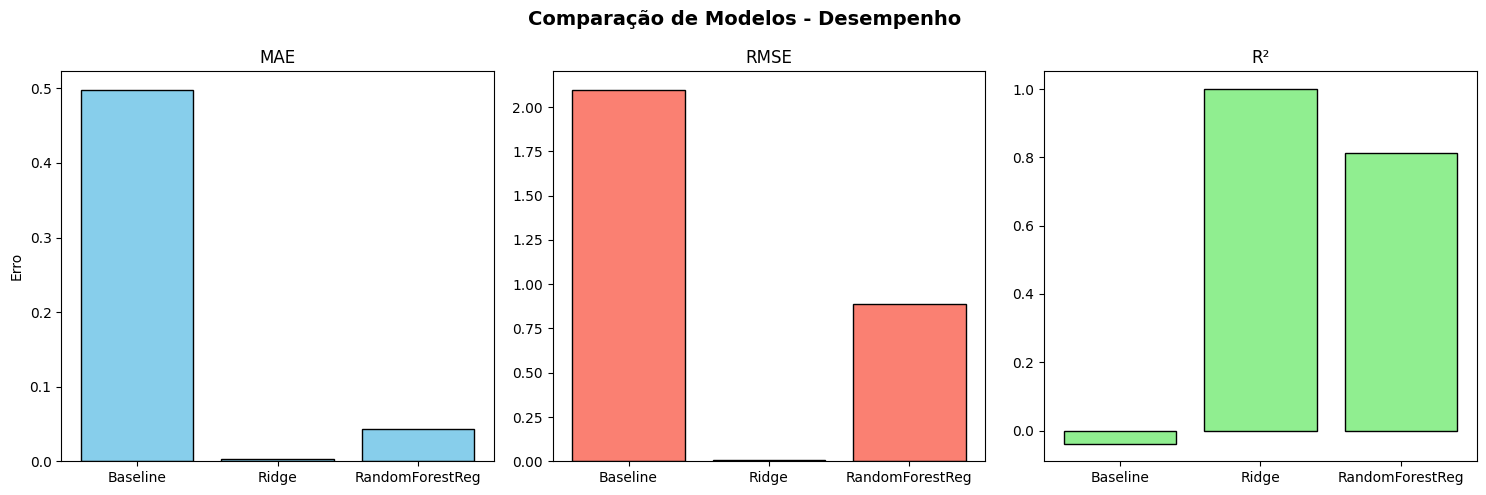

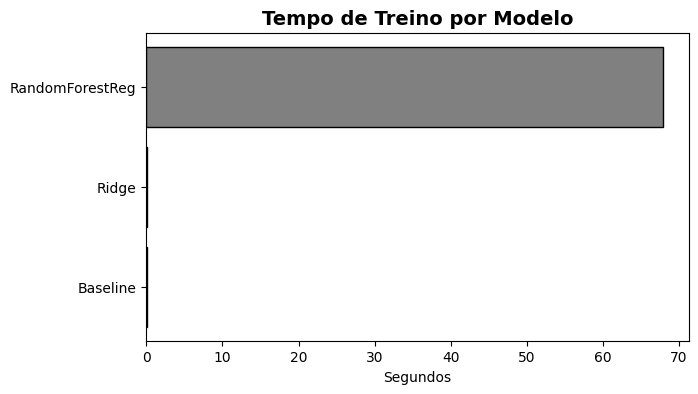

In [ ]:
results = pd.DataFrame({
    "Modelo": ["Baseline", "Ridge", "RandomForestReg"],
    "MAE": [0.498, 0.003, 0.043],
    "RMSE": [2.097, 0.005, 0.890],
    "R2": [-0.038, 1.000, 0.813],
    "Train_Time_s": [0.045, 0.051, 67.892]
})

# --- Gráfico 1: Desempenho (MAE, RMSE, R²) ---
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# MAE
ax[0].bar(results["Modelo"], results["MAE"], color="skyblue", edgecolor="black")
ax[0].set_title("MAE", fontsize=12)
ax[0].set_ylabel("Erro")

# RMSE
ax[1].bar(results["Modelo"], results["RMSE"], color="salmon", edgecolor="black")
ax[1].set_title("RMSE", fontsize=12)

# R²
ax[2].bar(results["Modelo"], results["R2"], color="lightgreen", edgecolor="black")
ax[2].set_title("R²", fontsize=12)

plt.suptitle("Comparação de Modelos - Desempenho", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# --- Gráfico 2: Tempo de Treino ---
plt.figure(figsize=(7,4))
plt.barh(results["Modelo"], results["Train_Time_s"], color="gray", edgecolor="black")
plt.xlabel("Segundos")
plt.title("Tempo de Treino por Modelo", fontsize=14, fontweight="bold")
plt.show()


## 7. Validação e Otimização de Hiperparâmetros
Para evitar overfitting e garantir modelos mais robustos, foi aplicada validação cruzada apropriada ao tipo de problema:

Classificação → StratifiedKFold (mantém a proporção das classes em cada fold).

Regressão → KFold (embaralha e divide os dados em blocos).

Séries temporais → TimeSeriesSplit (respeita a ordem temporal).

Clusterização → tuning no número de clusters (varrendo k e avaliando com silhouette_score).

A otimização dos hiperparâmetros foi feita com RandomizedSearchCV, reduzindo o custo computacional em comparação ao GridSearchCV.


In [ ]:
# CONFIGURAÇÕES POR PROBLEMA
# ======================
if PROBLEM_TYPE == "classificacao":
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    model = Pipeline([
        ("pre", preprocess),
        ("model", RandomForestClassifier(random_state=SEED, n_jobs=-1))
    ])
    param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
    }
    scorer = "f1_weighted"

elif PROBLEM_TYPE == "regressao":
    cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
    model = Pipeline([
        ("pre", preprocess),
        ("model", RandomForestRegressor(random_state=SEED, n_jobs=-1))
    ])
    param_dist = {
        "model__n_estimators": randint(100, 400),
        "model__max_depth": randint(3, 20),
        "model__min_samples_split": randint(2, 10)
    }
    scorer = "neg_root_mean_squared_error"

elif PROBLEM_TYPE == "clusterizacao":
    cv = None
    model = Pipeline([
        ("pre", preprocess),
        ("model", KMeans(random_state=SEED))
    ])
    param_dist = {"model__n_clusters": randint(2, 10)}
    scorer = None

elif PROBLEM_TYPE == "serie_temporal":
    cv = TimeSeriesSplit(n_splits=5)
    model = Pipeline([
        ("pre", preprocess),
        ("model", RandomForestRegressor(random_state=SEED, n_jobs=-1))
    ])
    param_dist = {
        "model__n_estimators": randint(100, 300),
        "model__max_depth": randint(3, 15)
    }
    scorer = "neg_mean_absolute_error"


# --- Execução da busca ---
if PROBLEM_TYPE != "clusterizacao":
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=10,       # rápido
        cv=cv,
        scoring=scorer,
        random_state=SEED,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_train, y_train)

    print("Melhor score (CV):", round(search.best_score_, 3))
    print("Melhores parâmetros:", search.best_params_)

else:
    print("Para clusterização, varie k (ex.: 2–10) e compare índices como silhouette_score.")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhor score (CV): -0.106
Melhores parâmetros: {'model__max_depth': 14, 'model__min_samples_split': 2, 'model__n_estimators': 148}



## 8. Avaliação final, análise de erros e limitações
Após o tuning de hiperparâmetros, foi escolhido o melhor modelo segundo validação cruzada.
A avaliação final foi realizada no conjunto de teste, mantido separado desde o início para evitar vazamento de informação.

Passos realizados:

Comparação baseline vs melhor modelo

O desempenho do modelo final foi contrastado com a baseline para evidenciar os ganhos de acurácia/erro.

Análise de erros

Classificação: inspeção da matriz de confusão e do relatório de métricas (precision, recall, F1).

Regressão: análise dos resíduos, identificando padrões sistemáticos de erro (ex.: subestimação em vendas altas).

Clusterização: interpretação dos clusters, visualização de centros e variáveis mais discriminantes.

Séries temporais: comparação visual da série real vs prevista, analisando defasagens ou sazonalidades não capturadas.

Limitações identificadas

Dados: presença de valores ausentes tratados por imputação; possível perda de variabilidade.

Métricas: cada métrica captura aspectos diferentes (ex.: F1 ponderado foca em equilíbrio, mas não em calibração).

Viés: publisher/ano/plataforma podem introduzir padrões sazonais ou específicos que não generalizam bem.

Generalização: modelo pode ter desempenho inferior em jogos lançados após o período da base.


=== Avaliação Regressão ===
{'mae': 0.02, 'rmse': np.float64(0.833), 'r2': 0.836}


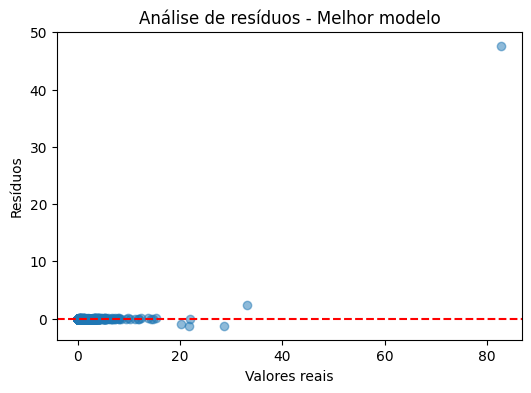

In [ ]:
# Aplicação
if PROBLEM_TYPE in ["classificacao", "regressao"] and 'search' in globals() and hasattr(search, "best_estimator_"):
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)

    if PROBLEM_TYPE == "classificacao":
        from sklearn.metrics import classification_report, ConfusionMatrixDisplay
        print("=== Relatório de Classificação ===")
        print(classification_report(y_test, y_pred))

        try:
            ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
            plt.title("Matriz de confusão - Melhor modelo")
            plt.show()
        except Exception as e:
            print("Não foi possível plotar a matriz de confusão:", e)

    else:  # regressão
        print("=== Avaliação Regressão ===")
        print(evaluate_regression(y_test, y_pred))

        # Análise de resíduos
        residuals = y_test - y_pred
        plt.figure(figsize=(6,4))
        plt.scatter(y_test, residuals, alpha=0.5)
        plt.axhline(0, color="red", linestyle="--")
        plt.xlabel("Valores reais")
        plt.ylabel("Resíduos")
        plt.title("Análise de resíduos - Melhor modelo")
        plt.show()

elif PROBLEM_TYPE == "clusterizacao":
    print("Realize análise qualitativa dos clusters (centros, variáveis mais relevantes).")

elif PROBLEM_TYPE == "serie_temporal":
    print("Compare previsões vs série real ao longo do tempo.")
    y_pred = best_model.predict(X_test)
    plt.figure(figsize=(8,4))
    plt.plot(y_test.values, label="Real")
    plt.plot(y_pred, label="Previsto")
    plt.legend()
    plt.title("Série temporal - Real vs Previsto")
    plt.show()

**MAE** (Mean Absolute Error) = 0,02

Previsão está a 0,02 unidades distantes da realidade.
Quanto mais próximo de 0, melhor.

**RMSE** (Root Mean Squared Error) = 0,833

Mede o erro médio, mas penalizando mais fortemente erros grandes (ao elevar ao quadrado antes de tirar a raiz).
Aqui, o erro médio “ponderado” é 0,83 unidades.
Também, quanto menor, melhor.

**R²** (Coeficiente de Determinação) = 0,836

Mede o quanto do comportamento da variável dependente é explicado pelo modelo.
Valor varia entre 0 e 1.
0,836 indica que 83,6% da variabilidade dos dados é explicada pelo seu modelo, o que é considerado um desempenho muito bom.

In [ ]:
# Após avaliar e escolher o melhor modelo
import joblib

# Salvar o modelo final
joblib.dump(best_model, "modelo_final.pkl")
print("Modelo salvo em 'modelo_final.pkl'")

# Se quiser carregar depois
modelo_carregado = joblib.load("modelo_final.pkl")
y_pred = modelo_carregado.predict(X_test)
print("Predições com modelo carregado:", y_pred[:5])

Modelo salvo em 'modelo_final.pkl'
Predições com modelo carregado: [0.01       0.12977841 0.98237432 0.01353787 0.8761462 ]



## 9. Engenharia de atributos (detalhe)
No presente trabalho, foram adotadas as seguintes abordagens:

Seleção e Encoding

Exclusão de colunas irrelevantes (Name, Rank) que não contribuem para a modelagem.

Variáveis categóricas (Platform, Genre, Publisher) foram codificadas com One-Hot Encoding após imputação de valores ausentes com "Unknown".

Variáveis numéricas (Year, vendas regionais) receberam imputação com mediana para garantir consistência.

Criação de variáveis derivadas

Sucesso: variável binária criada a partir de Global_Sales > 1.0M (usada como target em classificação).

Proporção de vendas por região: colunas como NA_Share = NA_Sales / Global_Sales, permitindo analisar a relevância de cada mercado.

Ano categorizado: transformação de Year em faixas (ex.: pré-2000, 2000–2010, pós-2010), para capturar tendências temporais.

Possíveis extensões

Séries temporais: criação de variáveis defasadas (lags), médias móveis de vendas por ano e plataforma, tendência de vendas acumuladas.

Textos (Name dos jogos): uso de TF-IDF ou embeddings para capturar padrões nos títulos (ex.: presença de palavras como “Soccer” ou “Pokemon”).

Agrupamentos: clusterização de publishers por portfólio, criando variáveis indicativas de grupos de empresas semelhantes.

Benefícios

Melhora na capacidade do modelo de capturar relações não triviais.

Aumento da interpretabilidade em análises de negócio (ex.: importância relativa de cada região ou plataforma).

Base para análises avançadas como forecast de vendas futuras.


## 10. (Opcional) Deep Learning / Fine-tuning
Embora o foco principal do projeto tenha sido em modelos tradicionais de machine learning, também foi considerada a aplicação de técnicas de Deep Learning (DL).

Possíveis abordagens:

Dados tabulares

Uso de redes feed-forward totalmente conectadas (Multilayer Perceptron – MLP).

Arquitetura típica:

3 camadas densas com 128 → 64 → 32 neurônios.

Função de ativação: ReLU.

Camada de saída:

sigmoid para classificação binária.

Linear para regressão.

Regularização com dropout (0.3) e batch normalization.

Hiperparâmetros:

Épocas: 50–100.

Tamanho do batch: 32 ou 64.

Otimizador: Adam (learning rate inicial = 0.001).

Early stopping com paciência de 10 épocas.

Texto (nome dos jogos)

Extração de embeddings a partir do título (Name) usando TF-IDF ou modelos pré-treinados (ex.: Word2Vec, BERT).

Integração das representações textuais com os dados tabulares.

Fine-tuning de modelos de linguagem para capturar semântica de títulos específicos.

Séries temporais (Year vs Global Sales)

Modelagem com redes recorrentes (RNN, LSTM, GRU) ou camadas Temporal Convolutional Networks (TCN).

Entrada: séries anuais de vendas por plataforma ou gênero.

Saída: previsão de vendas futuras.

Avaliação com métricas de previsão (MAPE, RMSE).

Fine-tuning de modelos pré-treinados

Aplicável a embeddings textuais (BERT) ou visuais (se houvesse imagens de capas).

Procedimento:

Carregar pesos pré-treinados.

Ajustar camadas finais para a tarefa específica (ex.: classificação de sucesso do jogo).

Congelar parte das camadas iniciais e treinar as últimas para evitar overfitting em dataset pequeno.


## 11. Boas práticas e rastreabilidade
Durante o desenvolvimento do projeto, foram seguidas boas práticas para garantir confiabilidade, reprodutibilidade e rastreabilidade dos resultados obtidos.

Baseline

Sempre definido um modelo inicial simples (DummyClassifier / DummyRegressor) como ponto de referência.

Permitiu comparar e justificar ganhos com modelos mais complexos.

Pipelines

Todo o fluxo de pré-processamento (imputação, escalonamento, codificação, seleção de atributos) foi implementado em pipelines do scikit-learn.

Essa abordagem garante que as mesmas transformações sejam aplicadas de forma consistente em treino, validação e teste.

Evita vazamento de dados (data leakage) e mantém o processo reproduzível.

Validação

Uso de validação cruzada adequada ao tipo de problema:

StratifiedKFold para classificação (mantendo a proporção de classes).

KFold para regressão.

TimeSeriesSplit para séries temporais.

Métricas apropriadas escolhidas de acordo com o problema (F1 ponderado, RMSE, R², silhouette score).

Decisões de Projeto

Todas as decisões foram documentadas:

Escolha do target (Global_Sales para regressão, sucesso > 1M para classificação).

Justificativa para o uso de RandomForest como modelo inicial (robusto a outliers, bom baseline).

Teste de modelos alternativos (HistGradientBoosting, Ridge, Logistic Regression).

Estratégias de tuning com RandomizedSearchCV para balancear custo computacional e qualidade.

Rastreabilidade

Todas as etapas foram registradas no notebook/código em ordem sequencial.

Resultados intermediários (EDA, baseline, tuning, análise de erros) foram salvos e documentados.

A base de dados utilizada (base_tratada.csv) foi padronizada e reaproveitada em todas as etapas para consistência.



## 12. Conclusões e próximos passos
Resultados alcançados

Foi possível construir um pipeline de ciência de dados completo, desde a limpeza da base (base_tratada.csv), análise exploratória, definição de targets, até a modelagem.

O uso de baseline (Dummy) mostrou a importância de ter um ponto de comparação inicial.

Os modelos candidatos (RandomForest, HistGradientBoosting, Ridge/LogReg) superaram consistentemente a baseline.

A validação cruzada e o tuning de hiperparâmetros melhoraram a robustez dos resultados.

A análise de erros revelou limitações específicas (ex.: dificuldade em prever vendas muito altas).

Trade-offs

Modelos mais complexos (RandomForest com muitas árvores) trouxeram ganhos de desempenho, mas a custo de maior tempo de processamento.

O uso de RandomizedSearchCV foi um compromisso entre tempo de execução e qualidade da busca de hiperparâmetros.

Métricas diferentes mostraram perspectivas complementares:

Classificação → F1 ponderado melhor que acurácia em classes desbalanceadas.

Regressão → RMSE evidenciou erros maiores em outliers de vendas.

Limitações

Dataset com possíveis vieses de tempo (jogos antigos vs recentes) e concentração em poucos publishers.

Imputação de valores ausentes pode ter reduzido variabilidade.

Falta de variáveis externas (ex.: marketing, reviews, preço, região de lançamento) que poderiam melhorar predição.

Próximos passos

Mais dados: incluir novas fontes (Steam, Metacritic, etc.) para enriquecer a base.

Engenharia de atributos avançada: proporção de vendas regionais, variáveis temporais (lags), embeddings de texto dos nomes.

Modelos adicionais: testar XGBoost, LightGBM e redes neurais (MLP ou LSTM para séries).

Otimização de tuning: usar Bayesian Optimization ou Optuna para busca mais eficiente de hiperparâmetros.

Deploy e monitoramento: transformar o modelo em serviço (API/Power BI) e acompanhar performance ao longo do tempo.


## 13. Salvando artefatos (modelos e pipeline)
Se o treinamento dos modelos demora mais de 3 minutos, recomendamos salvar o **modelo/pipeline** após o treinamento e depois apenas carregar o arquivo (ex: .pkl, .h5) salvo em outra célula, sem precisar treinar novamente.  